In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data=pd.read_csv("heart.csv")

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Visualisation of data

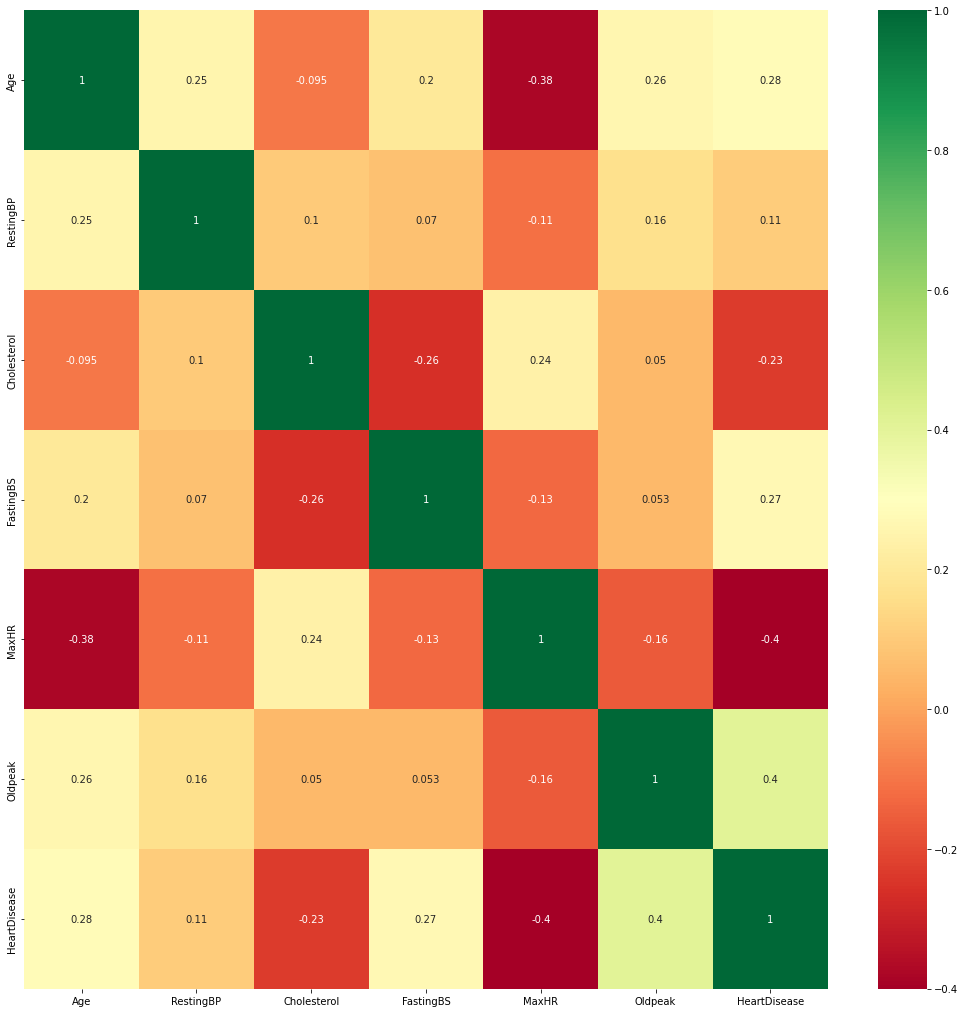

In [5]:
import seaborn as sns
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

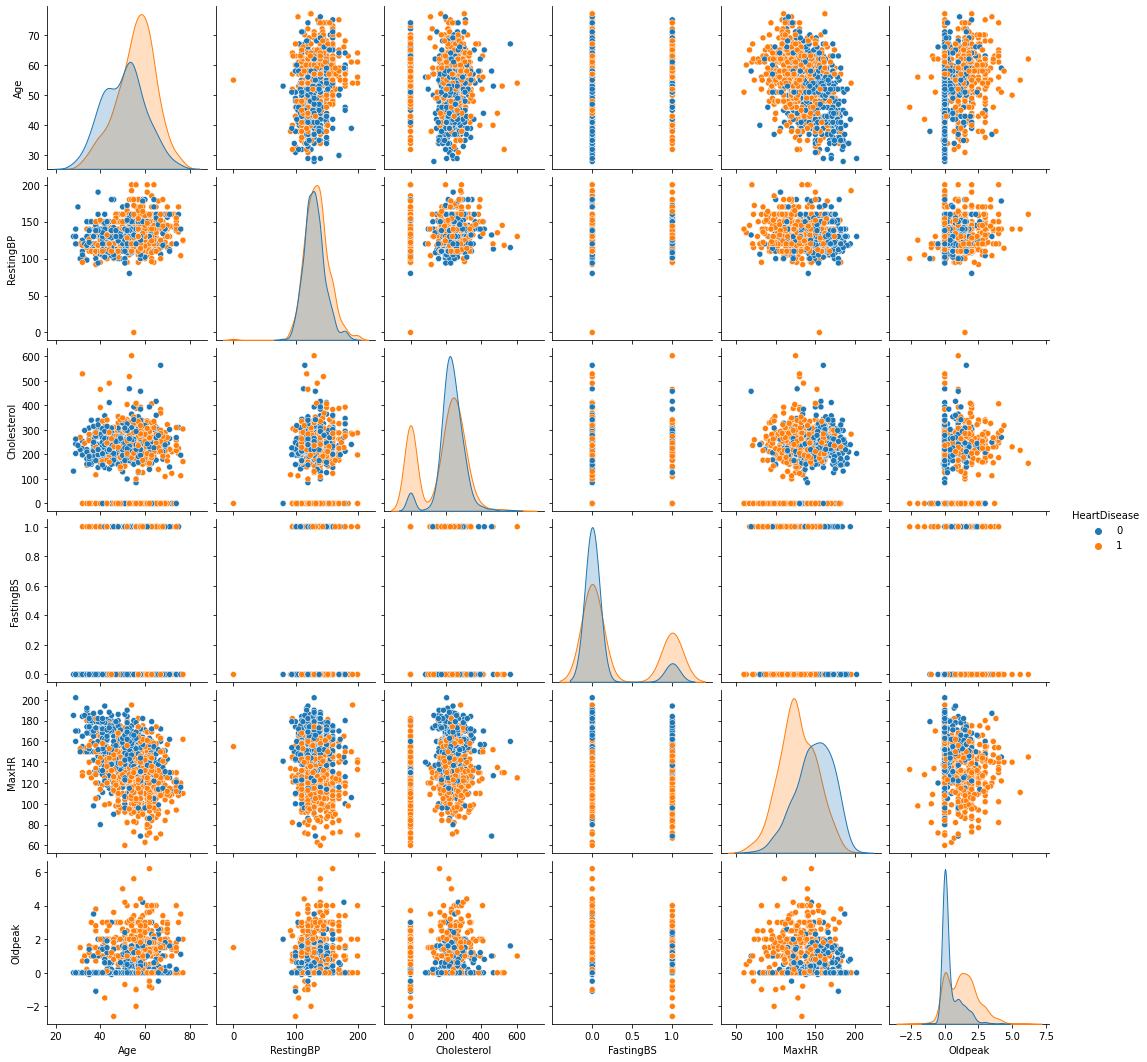

In [6]:
sns.pairplot(data=data, hue = 'HeartDisease')
plt.savefig("pne.png")

In [7]:
categorical_list = ["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope","HeartDisease"]

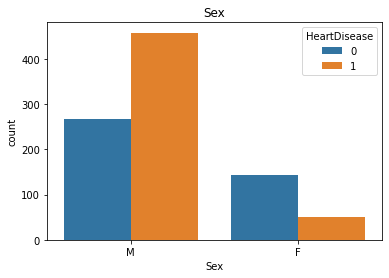

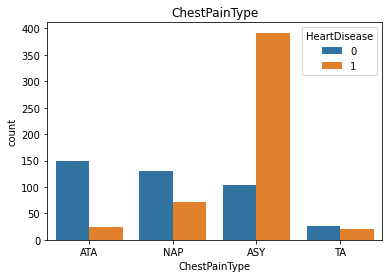

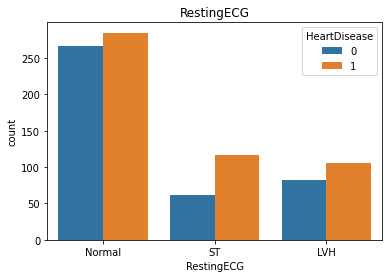

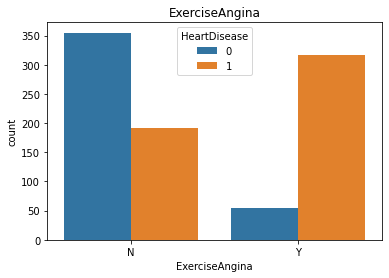

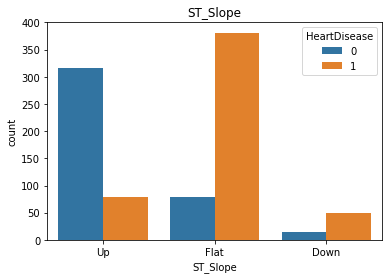

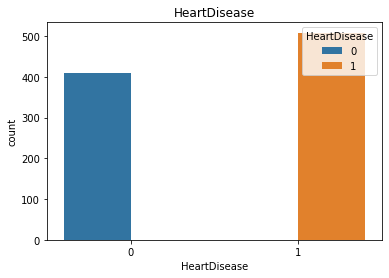

In [8]:
df_categoric = data.loc[:, categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_categoric,hue = "HeartDisease")
    plt.title(i)

In [11]:
data.shape

(918, 12)

In [12]:
X=data.iloc[:,:11]
Y=data.iloc[:,11]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42,stratify=Y)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.compose import make_column_transformer

In [15]:
nomi_col =[1,2,8,10]
ordi_col =[6]

trans = make_column_transformer((OneHotEncoder(sparse = False),nomi_col),(OrdinalEncoder(),ordi_col),remainder = 'passthrough')

In [16]:
de=trans.fit_transform(X_train)
me = trans.fit_transform(X_test)

In [17]:
de=pd.DataFrame(de)
me = pd.DataFrame(me)

In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Model : KNN

SIMPLE KNN


In [19]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,weights='distance')

sfs1 = SFS(KNN, k_features=8, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)
pipe_KNN = make_pipeline(trans,sfs1,KNN)

In [20]:
# grid_search = GridSearchCV(KNeighborsClassifier(),
#                            {
#                                'n_neighbors':np.arange(3,8,1),
#                                'weights':['unifrom','distance']
#                             },cv=5
#                            )
# grid_search.fit(de,y_train)

In [21]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# sfs1 = SFS(KNN, 
#            k_features=8, 
#            forward=True, 
#            floating=False, 
#            verbose=2,
#            scoring='accuracy',
#            cv=3)

# sfs1 = sfs1.fit(de, y_train)

In [22]:
# grid_search.best_params_

In [23]:
# sfs1.subsets_

In [24]:
pipe_KNN.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.4s finished

[2022-05-06 09:35:29] Features: 1/8 -- score: 0.8177570093457943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2022-05-06 09:35:29] Features: 2/8 -- score: 0.8177570093457943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2022-05-06 09:35:29] Features: 3/8 -- score: 0.8286604361370716[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3,
                                           estimator=KNeighborsClassifier(weights='distance'),
                                           k_features=8, scoring='accuracy',
                                           verbose=2)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(weights='distance'))])

In [25]:
pred_KNN = pipe_KNN.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_KNN,y_test)*100

84.78260869565217

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


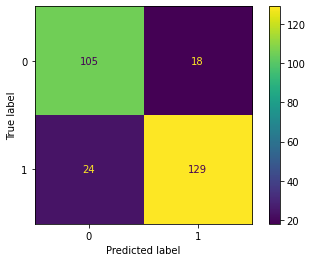

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe_KNN,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


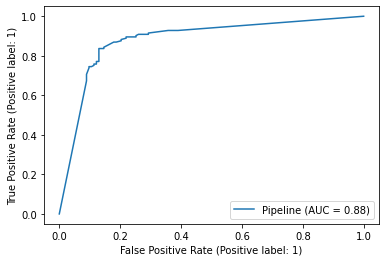

In [28]:
metrics.plot_roc_curve(pipe_KNN, X_test,y_test)

PCA KNN

In [29]:
pca=PCA(n_components=12,svd_solver="full")
sfs1 = SFS(KNN, k_features=6, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)
pipe_KNN_pca = make_pipeline(trans,pca,sfs1,KNN)

In [30]:
pipe_KNN_pca.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished

[2022-05-06 09:35:33] Features: 1/6 -- score: 0.7383177570093459[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-05-06 09:35:33] Features: 2/6 -- score: 0.8084112149532711[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished

[2022-05-06 09:35:33] Features: 3/6 -- score: 0.8130841121495328[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('pca', PCA(n_components=12, svd_solver='full')),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3,
                                           estimator=KNeighborsClassifier(weights='distance'),
                                           k_features=6, scoring='accuracy',
                                           verbose=2)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(weights='distance'))])

In [31]:
pred_KNN_pca = pipe_KNN_pca.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_KNN_pca,y_test)*100

86.59420289855072

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


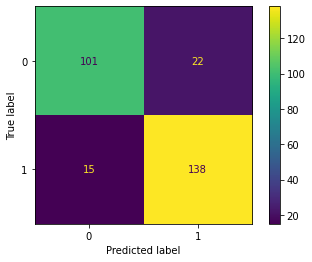

In [33]:

plot_confusion_matrix(pipe_KNN_pca,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


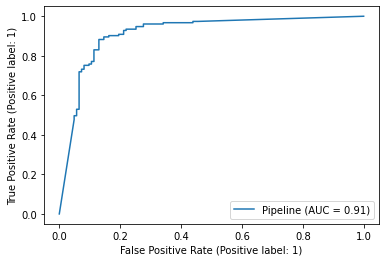

In [34]:
metrics.plot_roc_curve(pipe_KNN_pca, X_test,y_test)

LDA KNN

In [35]:
lda=LinearDiscriminantAnalysis()
# sfs1 = SFS(KNN, k_features=6, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)
pipe_KNN_lda = make_pipeline(trans,lda,KNN)

In [36]:
pipe_KNN_lda.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(weights='distance'))])

In [37]:
pred_KNN_lda = pipe_KNN_lda.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_KNN_lda,y_test)*100

80.79710144927536

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


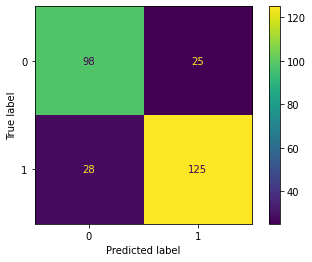

In [39]:
plot_confusion_matrix(pipe_KNN_lda,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


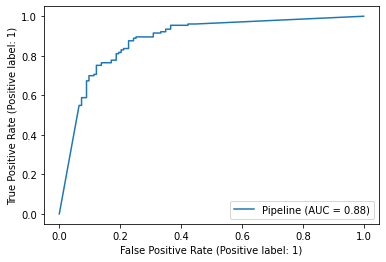

In [40]:
metrics.plot_roc_curve(pipe_KNN_lda, X_test,y_test)

## Model : Random Forest Classifier

Simple Random Forest Classifier

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=95,max_depth=5,criterion='gini')


In [43]:
# grid_search = GridSearchCV(model,
#                            {
#                                'criterion':['gini','entropy'],
#                               'n_estimators':np.arange(80,125,5),
#                               'max_depth':np.arange(1,8,1),
                            
#                             },cv=5
#                            )
# grid_search.fit(de,y_train)

In [44]:
# grid_search.best_params_

In [45]:
# params = {'criterion':['gini','entropy'],'max_depth':[None,2,6,8,12],'min_samples_split':[2,4,7,10],'min_samples_leaf':[15,100]}
g_pipe = make_pipeline(trans,model)

In [46]:
g_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, n_estimators=95))])

In [47]:
predictions = g_pipe.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)*100

89.4927536231884

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


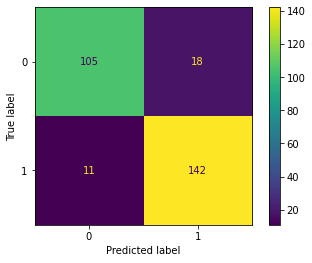

In [49]:
plot_confusion_matrix(g_pipe,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


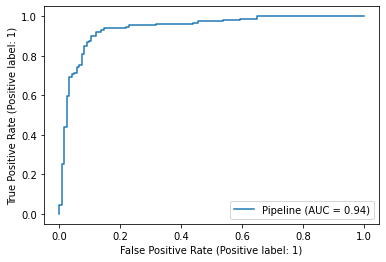

In [50]:
metrics.plot_roc_curve(g_pipe, X_test,y_test)

PCA Random Forest Classifier

In [51]:
pca=PCA(n_components=13,svd_solver="full")
g_pipe_pca = make_pipeline(trans,pca,model)

In [52]:
g_pipe_pca.fit(X_train,y_train)
predictions = g_pipe_pca.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)*100

89.13043478260869

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


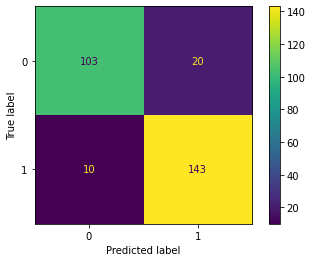

In [54]:
plot_confusion_matrix(g_pipe_pca,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


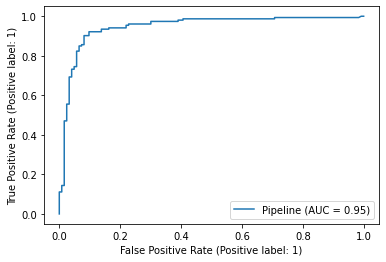

In [55]:
metrics.plot_roc_curve(g_pipe_pca, X_test,y_test)

LDA Random Forest Classifier

In [56]:
lda=LinearDiscriminantAnalysis()
g_pipe_lda = make_pipeline(trans,lda,model)

In [57]:
g_pipe_lda.fit(X_train,y_train)
predictions = g_pipe_lda.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(predictions,y_test)*100

84.78260869565217

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


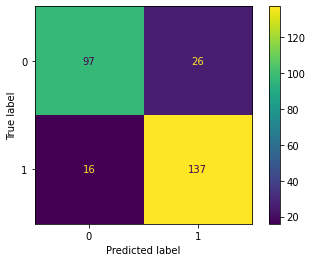

In [59]:
plot_confusion_matrix(g_pipe_lda,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


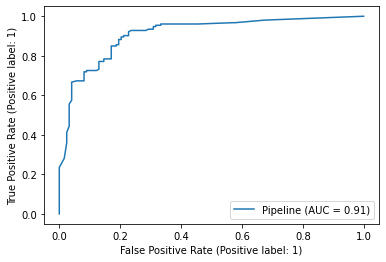

In [60]:
metrics.plot_roc_curve(g_pipe_lda, X_test,y_test)

## Model : SVC

Simple SVC

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc=SVC()
sfs2 = SFS(svc, k_features=13, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)
svm_pipe = make_pipeline(trans,StandardScaler(),sfs2, svc)
svm_pipe.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.8s finished

[2022-05-06 09:35:45] Features: 1/13 -- score: 0.8177570093457943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.4s finished

[2022-05-06 09:35:46] Features: 2/13 -- score: 0.8333333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.5s finished

[2022-05-06 09:35:46] Features: 3/13 -- score: 0.8348909657320872[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('standardscaler', StandardScaler()),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3, estimator=SVC(gamma='auto'),
                                           k_features=13, scoring='accuracy',
                                           verbose=2)),
                ('svc', SVC(gamma='auto'))])

In [62]:
preds = svm_pipe.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)*100

90.57971014492753

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


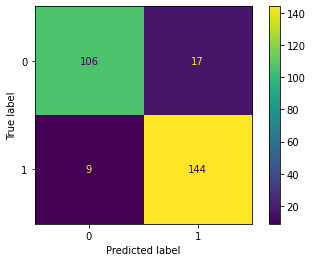

In [64]:
plot_confusion_matrix(svm_pipe,X_test,y_test)


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


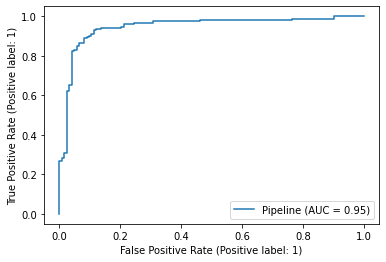

In [65]:
metrics.plot_roc_curve(svm_pipe, X_test,y_test)

PCA SVC

In [66]:
pca=PCA(n_components=13,svd_solver="full")

In [67]:
sfs2 = SFS(svc, k_features=9, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)

svm_pipe_pca = make_pipeline(trans,StandardScaler(),pca,sfs2, svc)
svm_pipe_pca.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.5s finished

[2022-05-06 09:35:53] Features: 1/9 -- score: 0.8489096573208723[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2022-05-06 09:35:54] Features: 2/9 -- score: 0.8566978193146418[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2022-05-06 09:35:54] Features: 3/9 -- score: 0.8613707165109035[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=13, svd_solver='full')),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3, estimator=SVC(gamma='auto'),
                                           k_features=9, scoring='accuracy',
                                           verbose=2)),
                ('svc', SVC(gamma='auto'))])

In [68]:
preds = svm_pipe_pca.predict(X_test)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)*100

89.85507246376811

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


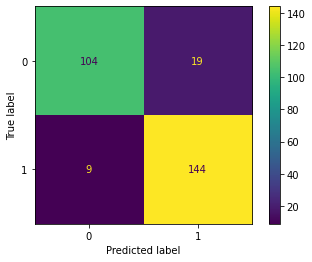

In [70]:
plot_confusion_matrix(svm_pipe_pca,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


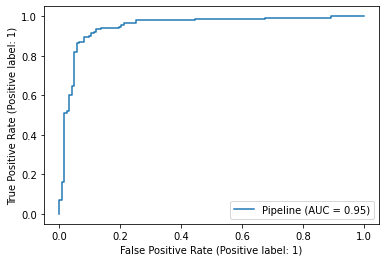

In [71]:
metrics.plot_roc_curve(svm_pipe_pca, X_test,y_test)

LDA SVC

In [72]:
svm_pipe_lda = make_pipeline(trans,StandardScaler(),lda,svc)

In [73]:
svm_pipe_lda.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis()),
                ('svc', SVC(gamma='auto'))])

In [74]:
preds = svm_pipe_lda.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)*100

86.23188405797102

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


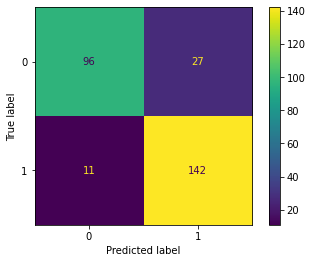

In [76]:
plot_confusion_matrix(svm_pipe_lda,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


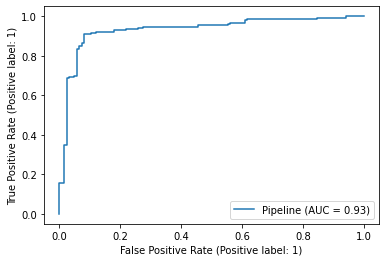

In [77]:
metrics.plot_roc_curve(svm_pipe_lda, X_test,y_test)

## Model : MLPClassifier

Simple MLPClassifier

In [96]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'tanh',random_state=1)
sfs3 = SFS(classifier, k_features=8, forward=True, floating=False, verbose=2,scoring='accuracy',cv=3)
pipe_mlp = make_pipeline(trans,sfs3,classifier)

In [97]:
pipe_mlp.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   17.4s finished

[2022-05-06 10:04:37] Features: 1/8 -- score: 0.8177570093457943[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   18.5s finished

[2022-05-06 10:04:56] Features: 2/8 -- score: 0.8348909657320872[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   35.4s finished

[2022-05-06 10:05:32] Features: 3/8 -- score: 0.8348909657320872[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3,
                                           estimator=MLPClassifier(activation='tanh',
                                                                   hidden_layer_sizes=(150,
                                                                                       100,
                                                                                       50),
                                                                   max_iter=300,
       

In [98]:
y_pred_mlp = pipe_mlp.predict(X_test)

In [99]:
accuracy_score(y_pred_mlp,y_test)*100

81.88405797101449

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


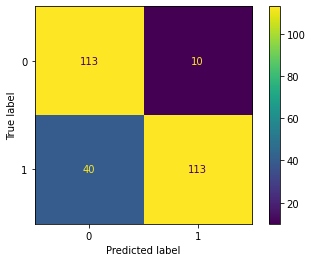

In [100]:
plot_confusion_matrix(pipe_mlp,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


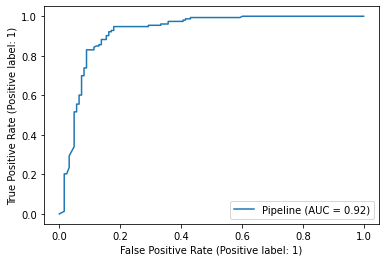

In [101]:
metrics.plot_roc_curve(pipe_mlp, X_test,y_test)

PCA MLPClassifier

In [102]:
pca=PCA(n_components=12,svd_solver="full")

pipe_mlp_pca = make_pipeline(trans,pca,sfs3,classifier)

In [103]:
pipe_mlp_pca.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   19.4s finished

[2022-05-06 10:08:10] Features: 1/8 -- score: 0.8099688473520249[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   37.0s finished

[2022-05-06 10:08:47] Features: 2/8 -- score: 0.8224299065420562[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaini

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('pca', PCA(n_components=12, svd_solver='full')),
                ('sequentialfeatureselector',
                 SequentialFeatureSelector(cv=3,
                                           estimator=MLPClassifier(activation='tanh',
                                                                   hidden_layer_sizes=(150,
                                                                                       100,
                                                                                       50),
                      

In [104]:
y_pred_mlp_pca = pipe_mlp_pca.predict(X_test)

In [105]:
accuracy_score(y_pred_mlp_pca,y_test)*100

85.14492753623189

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


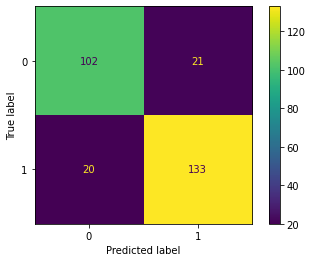

In [106]:
plot_confusion_matrix(pipe_mlp_pca,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


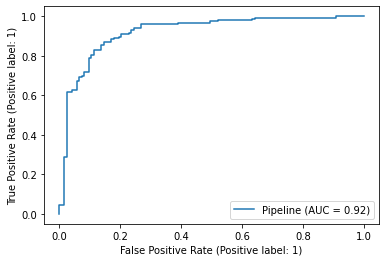

In [107]:
metrics.plot_roc_curve(pipe_mlp_pca, X_test,y_test)

LDA MLPClassifier

In [108]:
lda=LinearDiscriminantAnalysis()
pipe_mlp_lda = make_pipeline(trans,lda,classifier)

In [109]:
pipe_mlp_lda.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [1, 2, 8, 10]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), [6])])),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis()),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh',
                               hidden_layer_sizes=(150, 100, 50), max_iter=300,
                               random_state=1))])

In [110]:
y_pred_mlp_lda = pipe_mlp_lda.predict(X_test)

In [111]:
accuracy_score(y_pred_mlp_lda,y_test)*100

87.68115942028986

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


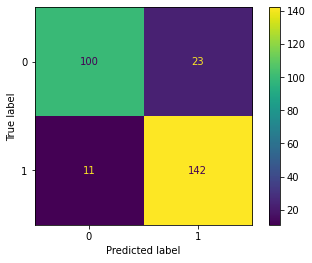

In [112]:
plot_confusion_matrix(pipe_mlp_lda,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


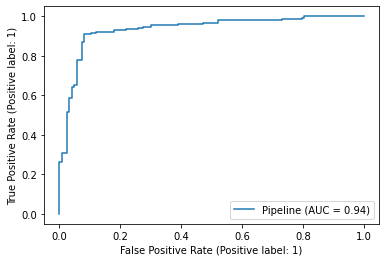

In [113]:
metrics.plot_roc_curve(pipe_mlp_lda, X_test,y_test)